# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer

# Importing dataset

In [2]:
data = pd.read_csv("Dataset/Ola_3000.csv" , delimiter=',', encoding = "ISO-8859-1")

In [3]:
data1 = pd.read_csv("Dataset/Uber_3000.csv", delimiter=',', encoding = "ISO-8859-1")

# EDA

In [4]:
data.isnull().sum()

Tweet Id          0
Text              0
Name              0
Screen Name       0
Created At        0
Favorites         0
Retweets          0
Language          0
Client            0
Tweet Type        0
Media Type     1973
Media URLs     1973
URLs              0
Hashtags          0
Mentions          0
dtype: int64

In [5]:
data1.isnull().sum()

Tweet Id          0
Text              0
Name              0
Screen Name       0
Created At        0
Favorites         0
Retweets          0
Language          0
Client            0
Tweet Type        0
Media Type     2988
Media URLs     2988
URLs              0
Hashtags          0
Mentions          0
dtype: int64

In [6]:
data

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions
0,756346841973854209,Thank you for sending us your CRNs and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0
1,756455385557446656,"@AverageIntel @PokemonGoApp \nWorry not, auto-...",Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2
2,756455843374075904,#KabaliDay https://t.co/jdQFl284qW,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0
3,756467451274027008,@suchetadalal We're in! Do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1
4,756468982169821184,@suchetadalal @MoneylifeF Done.,Ola,Olacabs,Fri Jul 22 12:40:34 +0000 2016,1,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1112319234749521920,@AkashRa66 Leak ?? #OlaRestrooms #NoPressure h...,Ola,Olacabs,Sun Mar 31 11:42:26 +0000 2019,0,1,Basque,"<a href=""http://twitter.com/download/iphone"" r...",Reply,GIF,https://video.twimg.com/tweet_video/D2_AcVIUcA...,0,2,1
2995,1112319536852660225,"@mahalakshmi3117 Wow, looks like theres a lea...",Ola,Olacabs,Sun Mar 31 11:43:38 +0000 2019,0,1,English,"<a href=""http://twitter.com/download/iphone"" r...",Reply,NaN,NaN,0,2,1
2996,1112319856760639488,@Arijit10Sinha #NoPressure #OlaRestrooms https...,Ola,Olacabs,Sun Mar 31 11:44:54 +0000 2019,0,1,Undetermined,"<a href=""http://twitter.com/download/iphone"" r...",Reply,GIF,https://video.twimg.com/tweet_video/D2_BAfRU8A...,0,2,1
2997,1112650634317029376,Thank you for laughing with us. While #OlaRest...,Ola,Olacabs,Mon Apr 01 09:39:17 +0000 2019,88,15,English,"<a href=""http://twitter.com/download/android"" ...",Tweet,Photo,https://pbs.twimg.com/media/D3Dt2pMUwAASHC7.jpg,2,1,0


In [7]:
data1

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions
0,1219498368902291457,"@gizmoddict Hi, we understand this can be upse...",Uber India,Uber_India,Tue Jan 21 05:54:02 +0000 2020,1,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
1,1219499752636723201,"@NickSavani Hey Savani, we've fixed this for y...",Uber India,Uber_India,Tue Jan 21 05:59:32 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
2,1219501628576993280,"@sanjusmenon Hey Sanju, for us to assist you b...",Uber India,Uber_India,Tue Jan 21 06:07:00 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,1,0,1
3,1219501840502489088,"@Njalan_tsk We understand your concern, Nikhil...",Uber India,Uber_India,Tue Jan 21 06:07:50 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
4,1219502844191170561,"@lucyfier10 Hey Vinay, we're sorry to hear abo...",Uber India,Uber_India,Tue Jan 21 06:11:49 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1230568803106512898,"@Sahana62579039 Hey Sahana, sorry to hear abou...",Uber India,Uber_India,Thu Feb 20 19:04:00 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,1,0,1
2995,1230583642495295489,"@PositiveRishi Hey there, we've refunded the f...",Uber India,Uber_India,Thu Feb 20 20:02:58 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
2996,1230588515773272064,"@Saurabh2729 Hey Saurabh, we've recorded your ...",Uber India,Uber_India,Thu Feb 20 20:22:20 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
2997,1230589682448322560,"@jugalhirani Sorry for the trouble, Jugal. Our...",Uber India,Uber_India,Thu Feb 20 20:26:58 +0000 2020,1,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1


In [8]:
dataset = pd.concat([data,data1])

In [9]:
dataset

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions
0,756346841973854209,Thank you for sending us your CRNs and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0
1,756455385557446656,"@AverageIntel @PokemonGoApp \nWorry not, auto-...",Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2
2,756455843374075904,#KabaliDay https://t.co/jdQFl284qW,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0
3,756467451274027008,@suchetadalal We're in! Do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1
4,756468982169821184,@suchetadalal @MoneylifeF Done.,Ola,Olacabs,Fri Jul 22 12:40:34 +0000 2016,1,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1230568803106512898,"@Sahana62579039 Hey Sahana, sorry to hear abou...",Uber India,Uber_India,Thu Feb 20 19:04:00 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,1,0,1
2995,1230583642495295489,"@PositiveRishi Hey there, we've refunded the f...",Uber India,Uber_India,Thu Feb 20 20:02:58 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
2996,1230588515773272064,"@Saurabh2729 Hey Saurabh, we've recorded your ...",Uber India,Uber_India,Thu Feb 20 20:22:20 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1
2997,1230589682448322560,"@jugalhirani Sorry for the trouble, Jugal. Our...",Uber India,Uber_India,Thu Feb 20 20:26:58 +0000 2020,1,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1


# Data Cleaning

In [10]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
dataset['Text'] = dataset['Text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [11]:
dataset['Text']

0       thank you for sending us your crns and showing...
1        averageintel  pokemongoapp  worry not  auto c...
2                                kabaliday https   t co  
3        suchetadalal we re in  do let us know how we ...
4                          suchetadalal  moneylifef done 
                              ...                        
2994       hey sahana  sorry to hear about the trouble...
2995     positiverishi hey there  we ve refunded the f...
2996       hey saurabh  we ve recorded your feedback a...
2997     jugalhirani sorry for the trouble  jugal  our...
2998     percykh hey  sorry to hear about the trouble ...
Name: Text, Length: 5998, dtype: object

# Model Building

In [12]:
dataset['Text'][0]

0    thank you for sending us your crns and showing...
0     gizmoddict hi  we understand this can be upse...
Name: Text, dtype: object

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [14]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [15]:
dataset['score'] = dataset['Text'].apply(calculate_sentiment)

In [16]:
dataset

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions,score
0,756346841973854209,thank you for sending us your crns and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0,0.8225
1,756455385557446656,averageintel pokemongoapp worry not auto c...,Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,-0.4404
2,756455843374075904,kabaliday https t co,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0,0.0000
3,756467451274027008,suchetadalal we re in do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1,0.4019
4,756468982169821184,suchetadalal moneylifef done,Ola,Olacabs,Fri Jul 22 12:40:34 +0000 2016,1,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1230568803106512898,hey sahana sorry to hear about the trouble...,Uber India,Uber_India,Thu Feb 20 19:04:00 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,1,0,1,0.6808
2995,1230583642495295489,positiverishi hey there we ve refunded the f...,Uber India,Uber_India,Thu Feb 20 20:02:58 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,0.6124
2996,1230588515773272064,hey saurabh we ve recorded your feedback a...,Uber India,Uber_India,Thu Feb 20 20:22:20 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,0.6124
2997,1230589682448322560,jugalhirani sorry for the trouble jugal our...,Uber India,Uber_India,Thu Feb 20 20:26:58 +0000 2020,1,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,-0.4588


In [17]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    else:
        return "negative"

In [18]:
dataset['sentiment'] = dataset['score'].apply(lambda val: polarity_score(val))
dataset.head()

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions,score,sentiment
0,756346841973854209,thank you for sending us your crns and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0,0.8225,positive
1,756455385557446656,averageintel pokemongoapp worry not auto c...,Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,-0.4404,negative
2,756455843374075904,kabaliday https t co,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0,0.0000,negative
3,756467451274027008,suchetadalal we re in do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1,0.4019,positive
4,756468982169821184,suchetadalal moneylifef done,Ola,Olacabs,Fri Jul 22 12:40:34 +0000 2016,1,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,0.0000,negative


In [19]:
dataset['ans'] = dataset['sentiment'].map({'positive' : 0, 'negative' : 1})

In [20]:
dataset['ans'].unique()

array([0, 1], dtype=int64)

In [21]:
dataset

,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions,score,sentiment,ans
0,756346841973854209,thank you for sending us your crns and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0,0.8225,positive,0
1,756455385557446656,averageintel pokemongoapp worry not auto c...,Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,-0.4404,negative,1
2,756455843374075904,kabaliday https t co,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0,0.0000,negative,1
3,756467451274027008,suchetadalal we re in do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1,0.4019,positive,0
4,756468982169821184,suchetadalal moneylifef done,Ola,Olacabs,Fri Jul 22 12:40:34 +0000 2016,1,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,0.0000,negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1230568803106512898,hey sahana sorry to hear about the trouble...,Uber India,Uber_India,Thu Feb 20 19:04:00 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,1,0,1,0.6808,positive,0
2995,1230583642495295489,positiverishi hey there we ve refunded the f...,Uber India,Uber_India,Thu Feb 20 20:02:58 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,0.6124,positive,0
2996,1230588515773272064,hey saurabh we ve recorded your feedback a...,Uber India,Uber_India,Thu Feb 20 20:22:20 +0000 2020,0,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,0.6124,positive,0
2997,1230589682448322560,jugalhirani sorry for the trouble jugal our...,Uber India,Uber_India,Thu Feb 20 20:26:58 +0000 2020,1,0,English,"<a href=""https://www.sprinklr.com"" rel=""nofoll...",Reply,NaN,NaN,0,0,1,-0.4588,negative,1


In [22]:
dataset['Text']

0       thank you for sending us your crns and showing...
1        averageintel  pokemongoapp  worry not  auto c...
2                                kabaliday https   t co  
3        suchetadalal we re in  do let us know how we ...
4                          suchetadalal  moneylifef done 
                              ...                        
2994       hey sahana  sorry to hear about the trouble...
2995     positiverishi hey there  we ve refunded the f...
2996       hey saurabh  we ve recorded your feedback a...
2997     jugalhirani sorry for the trouble  jugal  our...
2998     percykh hey  sorry to hear about the trouble ...
Name: Text, Length: 5998, dtype: object

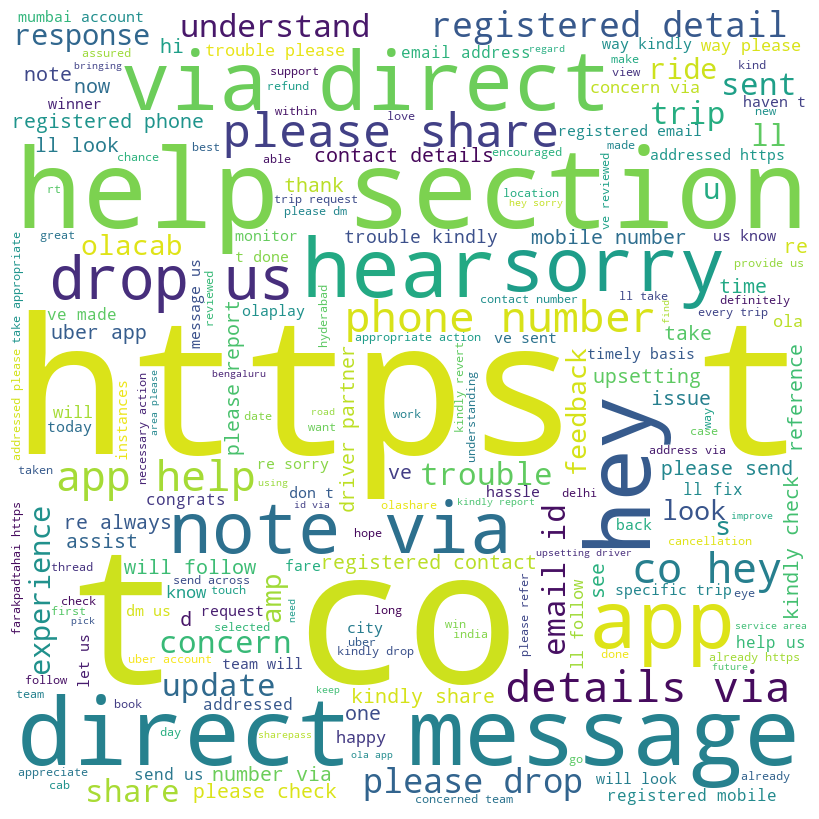

In [23]:
data = dataset
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Model Building

# Vectorization

In [24]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(dataset['Text'])

In [25]:
pickle.dump(tfidf,open('cv.pkl','wb'))

In [26]:
y = dataset['ans']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

# Model Building

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
evaluate(lr,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3911    6]
 [ 407  474]]
ACCURACY SCORE:
0.9139
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.905743    0.987500  0.913922     0.946622      0.920755
recall        0.998468    0.538025  0.913922     0.768247      0.913922
f1-score      0.949848    0.696547  0.913922     0.823197      0.903337
support    3917.000000  881.000000  0.913922  4798.000000   4798.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[967  14]
 [154  65]]
ACCURACY SCORE:
0.8600
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.862623    0.822785      0.86     0.842704      0.855352
recall       0.985729    0.296804      0.86     0.641266      0.860000
f1-score     0.920076    0.436242      0.86     0.678159      0.831776
support    981.000000  219.000000      0.86  1200.000000   1200.000000


# SVM

In [31]:
from sklearn import svm
sv = svm.SVC()
sv.fit(x_train, y_train)

SVC()

In [32]:
evaluate(sv,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3915    2]
 [  37  844]]
ACCURACY SCORE:
0.9919
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.990638    0.997636  0.991872     0.994137      0.991923
recall        0.999489    0.958002  0.991872     0.978746      0.991872
f1-score      0.995044    0.977417  0.991872     0.986231      0.991807
support    3917.000000  881.000000  0.991872  4798.000000   4798.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[968  13]
 [144  75]]
ACCURACY SCORE:
0.8692
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.870504    0.852273  0.869167     0.861388      0.867176
recall       0.986748    0.342466  0.869167     0.664607      0.869167
f1-score     0.924988    0.488599  0.869167     0.706794      0.845347
support    981.000000  219.000000  0.869167  1200.000000   1200.000000


# KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
evaluate(neigh,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3775  142]
 [ 216  665]]
ACCURACY SCORE:
0.9254
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.945878    0.824040  0.925386     0.884959      0.923506
recall        0.963748    0.754824  0.925386     0.859286      0.925386
f1-score      0.954729    0.787915  0.925386     0.871322      0.924099
support    3917.000000  881.000000  0.925386  4798.000000   4798.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[902  79]
 [105 114]]
ACCURACY SCORE:
0.8467
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895730    0.590674  0.846667     0.743202      0.840057
recall       0.919470    0.520548  0.846667     0.720009      0.846667
f1-score     0.907445    0.553398  0.846667     0.730421      0.842831
support    981.000000  219.000000  0.846667  1200.000000   1200.000000


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [36]:
evaluate(clf,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3917    0]
 [ 881    0]]
ACCURACY SCORE:
0.8164
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.816382    0.0  0.816382     0.408191      0.666479
recall        1.000000    0.0  0.816382     0.500000      0.816382
f1-score      0.898910    0.0  0.816382     0.449455      0.733854
support    3917.000000  881.0  0.816382  4798.000000   4798.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[981   0]
 [219   0]]
ACCURACY SCORE:
0.8175
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.817500    0.0    0.8175     0.408750      0.668306
recall       1.000000    0.0    0.8175     0.500000      0.817500
f1-score     0.899587    0.0    0.8175     0.449794      0.735413
support    981.000000  219.0    0.8175  1200.000000   1200.000000


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
evaluate(DT,x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3917    0]
 [   0  881]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3917.0  881.0       1.0     4798.0        4798.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[901  80]
 [ 39 180]]
ACCURACY SCORE:
0.9008
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.958511    0.692308  0.900833     0.825409      0.909929
recall       0.918451    0.821918  0.900833     0.870184      0.900833
f1-score     0.938053    0.751566  0.900833     0.844809      0.904019
support    981.000000  219.000000  0.900833  1200.000000   1200.000000


# Model Saving

In [39]:
pickle.dump(DT,open('model.pkl','wb'))